In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from astropy.io import fits

### To-do for the polar project: 

#### Disk center:

- Generate atmosphere for the disk center using modellador 
- Synthesize SIR specta using SIR / parallel SIR 
- Compare both the atmospheres and the spectra (this verifies velocities, Bs etc.) 
- Ivan: Create synthetic datasets with different PSFs, and invert using a M-E code. Investigate Apparent open flux   vs the PSF 
- Check whether binning makes any difference? (Probably not a result) 
- Repeat all this on a map without any contrast to confirm that contrast is the reason! 
- *Stray light influence:* For this we need a different inversion code. Or maybe Jaime already has a version of the   code with ff? Question is does stray light influence open flux?
- NO DISAMBIGUATION NEEDED

#### Limb / pole:

- Slant the atmosphere - compare 
- Modellador as above
- SIR as above 
- Blos vs tau thingie (non constant it seems?) 
- Repeat the different PSFs / binnings 
- After that compare different disambiguations (Eto / Tsuneta paper, what else?) 

- NOISE 

- What about results from our paper with Xudong and Ana, about "radial magnetic fields". Do we get different inclination distribution with the filling factor? 

- Done with the paper



In [15]:
import muram as mio

In [16]:
muramdir = 'X:\\xenosh\\qs_cube_elias'

In [17]:
iter = 63000

In [18]:
temp = mio.MuramCube(muramdir,iter,'Temp')

In [19]:
temp.shape

(480, 1536, 1536)

In [20]:
temp = temp.transpose(1,2,0)

In [21]:
temp.shape

(1536, 1536, 480)

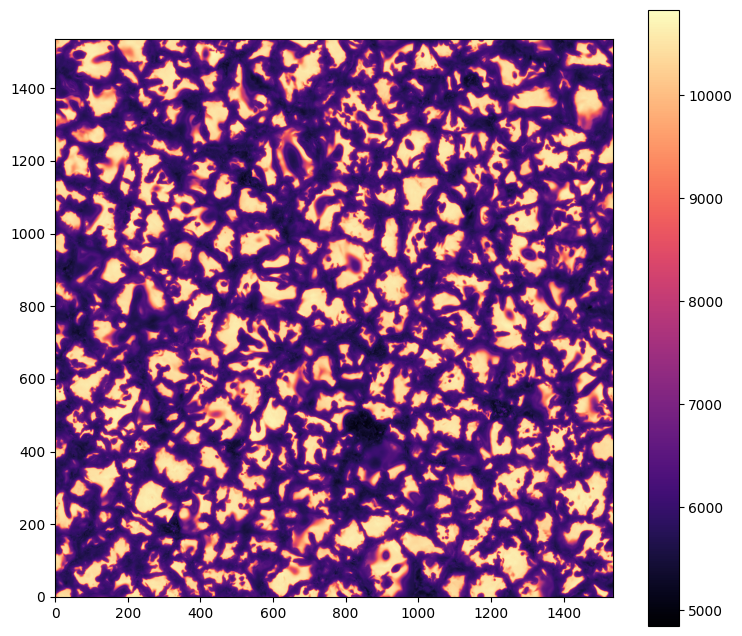

In [22]:
plt.figure(figsize=[9,8])
plt.imshow(temp[:,:,385].T,cmap='magma',origin='lower')
plt.colorbar()

In [23]:
z_total = 480*16
print (z_total)

7680


In [12]:
from astropy.io import fits

In [13]:
vz = mio.MuramCube(muramdir, iter, 'vx')
vz = vz.transpose(2,1,0)


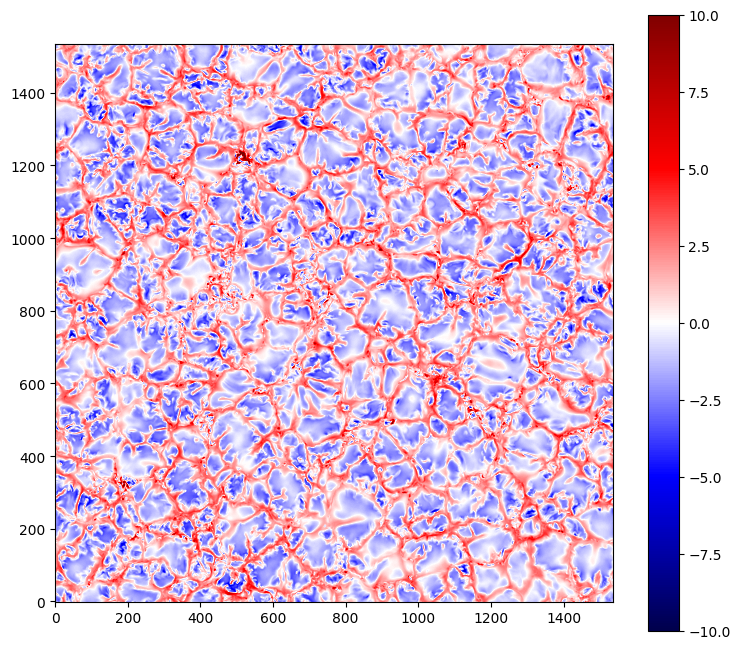

In [14]:
plt.figure(figsize=[9,8])
plt.imshow(-vz[:,:,391].T/1E5,cmap='seismic',origin='lower', vmin=-10,vmax=10)
plt.colorbar()

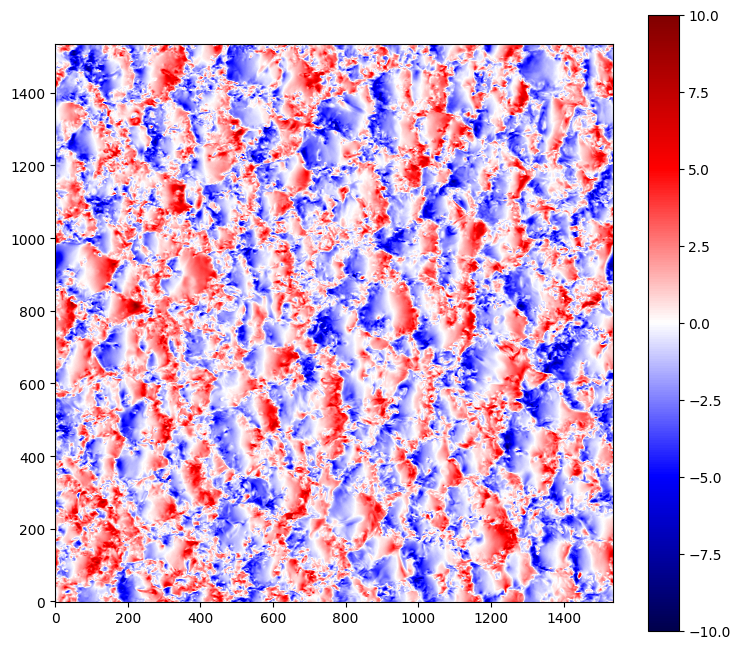

In [15]:
vx = mio.MuramCube(muramdir, iter, 'vz')
vx = vx.transpose(2,1,0)
plt.figure(figsize=[9,8])
plt.imshow(vx[:,:,385].T/1E5,cmap='seismic',origin='lower', vmin=-10,vmax=10)
plt.colorbar()


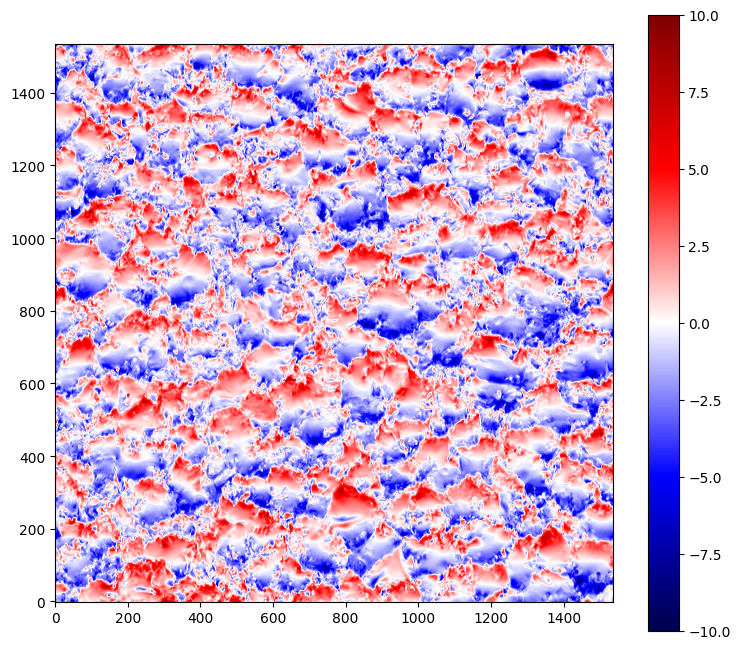

In [16]:
vy = mio.MuramCube(muramdir, iter, 'vy')
vy = vy.transpose(2,1,0)
plt.figure(figsize=[9,8])
plt.imshow(vy[:,:,385].T/1E5,cmap='seismic',origin='lower', vmin=-10,vmax=10)
plt.colorbar()

In [24]:
Bz = mio.MuramCube(muramdir, iter, 'Bx')
Bz = Bz.transpose(1,2,0)

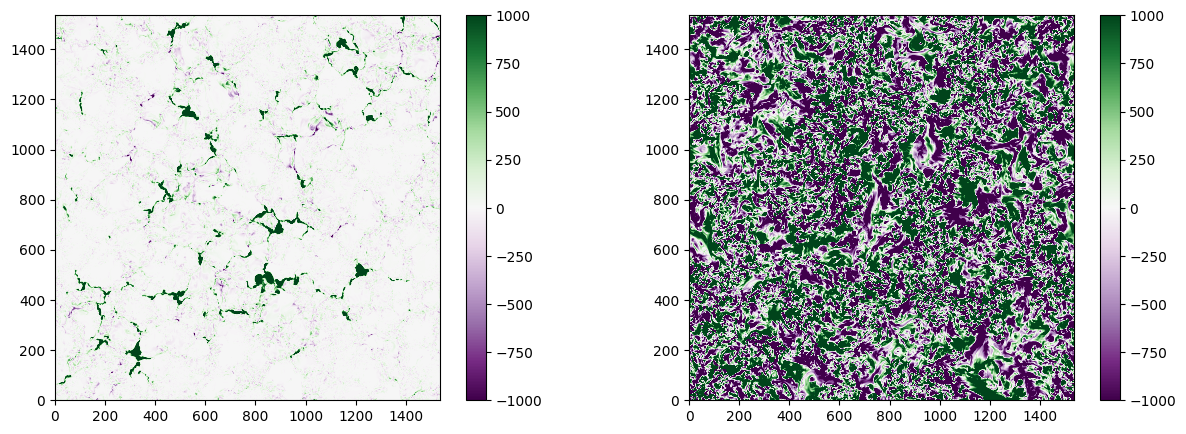

In [25]:

plt.figure(figsize=[15,5])
plt.subplot(121)
plt.imshow(Bz[:,:,385].T*np.sqrt(4*np.pi),cmap='PRGn',origin='lower', vmin=-1000,vmax=1000)
plt.colorbar()
plt.subplot(122)
plt.imshow(Bz[:,:,0].T*np.sqrt(4*np.pi),cmap='PRGn',origin='lower', vmin=-1000,vmax=1000)
plt.colorbar()

In [26]:
print(np.sum(Bz[:,:,385]))
print(np.sum(Bz[:,:,400]))

19971810.0
19971802.0


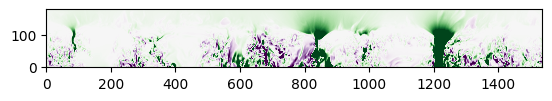

In [27]:
plt.imshow(Bz[:,512,300:].T*np.sqrt(4*np.pi),cmap='PRGn',origin='lower', vmin=-500,vmax=500)

In [28]:
z = np.arange(480) * 16.0

In [29]:
Tmean = np.mean(temp,axis=(0,1))

(3000.0, 10000.0)

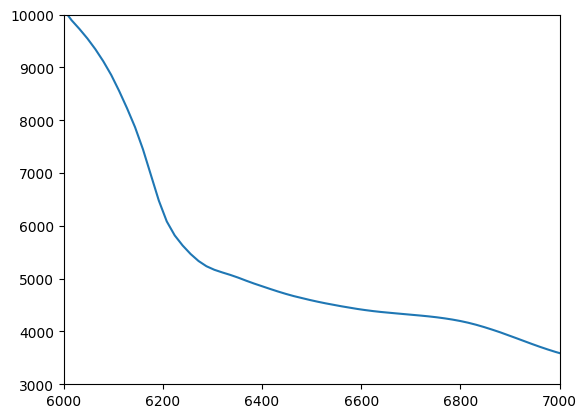

In [30]:
plt.plot(z, Tmean)
plt.xlim([6000,7000])
plt.ylim([3000,10000])

In [17]:
# gde je 16200
np.argmin(np.abs(z-6200))

387

In [8]:
temp = temp.transpose(1,2,0)
temp.shape

(1536, 1536, 480)

In [28]:
high = np.where(temp[:,:,-100:] > 22000.0)

In [29]:
high = np.asarray(high)

In [30]:
high.shape

(3, 1291)

In [32]:
high[:,0]

array([133, 543,  87])

In [94]:
hl = 360
hh = 430
xl = 100
xh = 101
yl = 50
yh = 51

In [95]:
atmos = np.zeros([12,xh-xl,yh-yl,hh-hl])
atmos.shape

(12, 1, 1, 70)

In [96]:
atmos[2,:,:,:] = temp[hl:hh,xl:xh,yl:yh].transpose(1,2,0)
del(temp)

In [97]:
P = mio.MuramCube(muramdir, iter, 'P')
atmos[3,:,:,:] = P[hl:hh,xl:xh,yl:yh].transpose(1,2,0)
del(P)

In [98]:
vx = mio.MuramCube(muramdir, iter, 'vx')
atmos[9,:,:,:] = vx[hl:hh,xl:xh,yl:yh].transpose(1,2,0)
del(vx)


In [99]:
Bxtemp = mio.MuramCube(muramdir, iter, 'Bx')
Bx = Bxtemp[hl:hh,xl:xh,yl:yh].transpose(1,2,0)*np.sqrt(4*np.pi)
del(Bxtemp)
Bytemp = mio.MuramCube(muramdir, iter, 'By')
By = Bytemp[hl:hh,xl:xh,yl:yh].transpose(1,2,0)*np.sqrt(4*np.pi)
del(Bytemp)
Bztemp = mio.MuramCube(muramdir, iter, 'Bz')
Bz = Bztemp[hl:hh,xl:xh,yl:yh].transpose(1,2,0)*np.sqrt(4*np.pi)
del(Bztemp)

Bx[:,:,:] = 500.0 / 1.41
By[:,:,:] = 500.0 / 1.41
Bz[:,:,:] = 500.0


In [100]:
atmos[7,:,:,:] = np.sqrt(Bx**2.0 + By**2.0 + Bz**2.0)

In [101]:
atmos[10,:,:,:] = np.arccos(Bx/atmos[7,:,:,:])

In [102]:
atmos[11,:,:,:] = np.arctan(Bz/By)

In [103]:
h = np.linspace(0,(hh-hl-1)*16.*1E5,hh-hl)

In [104]:
atmos[1,:,:,:] = h[None,None,:]

In [105]:
atmos = atmos.astype("float32")

In [106]:
print(atmos.shape)
atmos = atmos.reshape(12,70)
np.savetxt("granule_500_500G.dat",atmos[:,::-1].T,fmt="%1.5e")

(12, 1, 1, 70)


In [ ]:
import pyana

In [ ]:
pyana.fzwrite("muram_pole_1.f0",atmos[:,:300,:,:],0,'temp')

In [ ]:
pyana.fzwrite("muram_pole_2.f0",atmos[:,300:,:,:],0,'temp')

In [ ]:
plt.figure(figsize=[9.5,8])
plt.imshow(atmos[2,:,:,-1].T,origin='lower')
plt.colorbar()

### Convert to SIR format: 

In [5]:
temp = mio.MuramCube(muramdir, iter, 'T')

In [6]:
hl = 350
hh = 430
xl = 0
xh = 1536
yl = 0
yh = 1536

In [7]:
atmos = np.zeros([11,hh-hl,xh-xl,yh-yl])

In [8]:
tau = np.linspace(4.0,-5.0,hh-hl)

In [9]:
atmos[0,:,:,:] = tau[:,None,None]

In [10]:
atmos[1,:,:,:] = np.copy(temp[hl:hh,xh:xl,yh:yl])
del(temp)

In [11]:
#modelin[2,:,kk,jj] = Pgas[:, jj, kk]/10.
#modelin[3,:,kk,jj] = zeroarr[:]
#modelin[4,:,kk,jj] = B[:, jj, kk]
#modelin[5,:,kk,jj] = vlos[:, jj, kk]
#modelin[6,:,kk,jj] = incl[:, jj, kk]
#modelin[7,:,kk,jj] = azi[:, jj, kk]
#modelin[8,:,kk,jj] = height[:]
#modelin[9,:,kk,jj] = Pgas[:, jj, kk]
#modelin[10,:,kk,jj] = zeroarr[:]

In [12]:
P = mio.MuramCube(muramdir, iter, 'P')
atmos[3,:,:,:] = P[hl:hh,xl:xh,yl:yh] * 0.1
atmos[9,:,:,:] = P[hl:hh,xl:xh,yl:yh]
del(P)

In [13]:
    # vx is actually vlos
    vlos = mio.MuramCube(muramdir, iter, 'vx')
    atmos[5,:,:,:] = vlos[hl:hh,xl:xh,yl:yh]
    del(vlos)

In [14]:
# Now B: 
Bxtemp = mio.MuramCube(muramdir, iter, 'Bx')
Bx = Bxtemp[hl:hh,xl:xh,yl:yh]*np.sqrt(4*np.pi)
del(Bxtemp)
Bytemp = mio.MuramCube(muramdir, iter, 'By')
By = Bytemp[hl:hh,xl:xh,yl:yh]*np.sqrt(4*np.pi)
del(Bytemp)
Bztemp = mio.MuramCube(muramdir, iter, 'Bz')
Bz = Bztemp[hl:hh,xl:xh,yl:yh]*np.sqrt(4*np.pi)
del(Bztemp)

In [ ]:
atmos[4,:,:,:] = np.sqrt(Bx**2.0 + By**2.0 + Bz**2.0)
atmos[6,:,:,:] = np.arccos(Bx/atmos[7,:,:,:])
atmos[7,:,:,:] = np.arctan(Bz/By)

In [13]:
data2 = np.fromfile("X:\\xenosh\\Full_simulation\\temp.float", dtype = np.float32)
data2.shape

(4294967296,)

In [8]:
data = np.fromfile("X:\\xenosh\\Full_simulation\\temp.float", dtype=float, sep='')
data.shape

(2147483648,)

In [9]:
4096*256*4096

4294967296

In [14]:
data1 = data2.reshape(4096,256,4096)
data1.shape

(4096, 256, 4096)

In [15]:
data1 = data1.transpose(0,2,1)
data1.shape

(4096, 4096, 256)

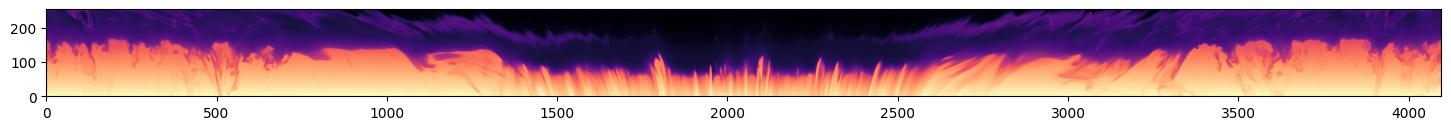

In [45]:
plt.figure(figsize=[18,20])
plt.imshow(data1[:,2000,:].T,origin='lower',cmap='magma')

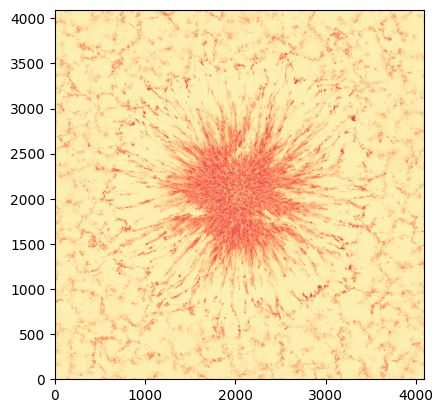

In [22]:
plt.imshow(data1[:,:,0].T,origin='lower',cmap='magma')

In [27]:
nx, ny, nz = data1.shape


b = np.zeros((int(nx/4),int(ny/4),nz))
for i in range(256):
    b[:,:,i] = np.sum(data1[:,:,i].reshape(int(nx/4),4,int(ny/4),4),axis=(1,3))/16.0
b.shape

(1024, 1024, 256)

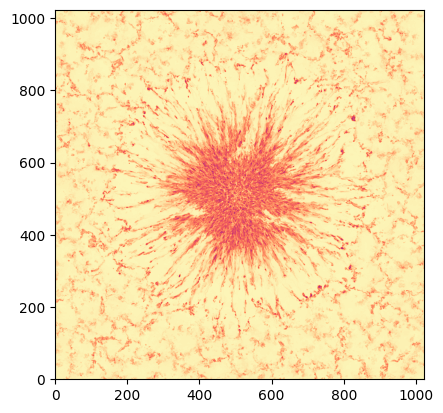

In [28]:
plt.imshow(b[:,:,0].T,origin='lower',cmap='magma')

In [29]:
np.std(b)

4511.562863693813

In [31]:
filepath = "/dat/schmassmann/rempel/spot_12x8x12km_ng/temp.float"

In [36]:
filepath[42:-6]

'temp'

In [ ]:
hdu = fits.PrimaryHDU(b)
hdu.writeto("/dat/xenosh/Full_simulation/"+filepath[42:-6]+"_bin.fits", overwrite = True)